# Week 2 Tutorial {-}


### Unit Convenor & Lecturer {-}

[George Milunovich](https://www.georgemilunovich.com)  
[george.milunovich@mq.edu.au](mailto:george.milunovich@mq.edu.au)

---

**Objectives**

1. Read Week 2 - Sample Short-Answer Questions (5 min)
2. Complete Week 2 Practice Quiz (15 min)
3. Analyse Credit Card Defaults data by taking the following steps:
    - read Credit Card data from the web into a `pandas` dataframe using the `skiprows=[0]` option
    - save an .xlsx copy into the data folder using `to_excel()` `pandas` method
    - print the first 10 observations to see what the data looks like using `head()` `pandas` method
    - print `DataFrame` `info()` and comment on the number of observations, Non-Null Count, and Dtype
    - rename the column PAY_0 as PAY_1 and default payment next month as payment_default using `rename()` pandas method
    - provide descriptive statistics table using `describe()` command, print its transpose using `T`, and comment
    - create two numpy arrays: y = payment_default X = Pay_1 and AGE (use only first 100 observations)
    - standardise X and check for mean 0, variance 1
    - save our Perceptron algorithm in Perceptron.py
    - replace `return np.where(self.net_input(X) >= 0, 1, -1)` with `return np.where(self.net_input(X) >= 0, 1, 0)`
    - import `Perceptron` as `prc` to this notebook
    - import matplotlib
    - train the model and plot errors vs no of epochs
    - compute classification accuracy (percent of total observations) 
    - copy and paste `plot_decision_regions` function from Week2 lecture Jupyter Notebook
    - Plot decision regions for our Credit Card Default Classifier
4. Additional Python Tutorial (to be completed as part of self-study activity) 
    - Python `list` object
    - Python `if` statements
    - Python `for` loop


---

## Basic Analysis of Credit Card Default data {-}


We will use this credit card dataset [https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

1. Read Credit Card data from the web into a `pandas` dataframe using the `skiprows=[0]` option

```
import pandas as pd
# pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing

df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', skiprows=[0])
```

In [2]:
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing

df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', skiprows=[0])

2. Save an .xlsx copy into the data folder using `to_excel()` `pandas` method

```
df.to_excel('data/credit_card_defaults.xlsx')
```

In [3]:
df.to_excel('data/credit_card_defaults.xlsx')

3. Print the first 10 observations to see what the data looks like using `head()` `pandas` method

```
df.head(10)
```

**Credit Card Defaults Dataset**
[https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)


Note there are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)




4. print `DataFrame` `info()` and comment on the number of observations, Non-Null Count, and Dtype

```
df.info()
```

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

5. rename the column PAY_0 as PAY_1 and default payment next month as payment_default using `rename()` pandas method

```
df = df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'payment_default'})
```

In [6]:
df = df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'payment_default'})


6. provide descriptive statistics table using `describe()` command, print its transpose using `T`, and comment

```
df.describe().T
```


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


7. create two numpy arrays 

- y = payment_default 
- X = [Pay_1 and AGE] (use only first 100 observations)


```
y = df['payment_default'].loc[:99].values
X = df[['PAY_1', 'AGE']].loc[:99].values

print(y, y.shape)
print(X, X.shape)
```

In [10]:


y = df['payment_default'].loc[:99].values
X = df[['PAY_1', 'AGE']].loc[:99].values

print(y, y.shape)
print(X, X.shape)

[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1] (100,)
[[ 2 24]
 [-1 26]
 [ 0 34]
 [ 0 37]
 [-1 57]
 [ 0 37]
 [ 0 29]
 [ 0 23]
 [ 0 28]
 [-2 35]
 [ 0 34]
 [-1 51]
 [-1 41]
 [ 1 30]
 [ 0 29]
 [ 1 23]
 [ 0 24]
 [ 0 49]
 [ 1 49]
 [ 1 29]
 [ 0 39]
 [-1 39]
 [ 2 26]
 [-2 40]
 [ 0 23]
 [ 0 23]
 [ 1 27]
 [ 0 30]
 [-1 47]
 [ 0 26]
 [-1 27]
 [ 2 33]
 [ 0 32]
 [-2 54]
 [-2 58]
 [-1 30]
 [ 0 40]
 [ 0 22]
 [ 1 25]
 [-1 31]
 [ 0 33]
 [ 0 25]
 [ 0 22]
 [ 0 37]
 [ 0 30]
 [-2 29]
 [ 0 22]
 [ 0 46]
 [-1 32]
 [ 0 24]
 [ 1 42]
 [ 0 43]
 [-2 49]
 [ 1 25]
 [ 2 29]
 [-2 45]
 [ 0 34]
 [ 0 34]
 [-1 34]
 [ 0 29]
 [ 0 28]
 [ 0 39]
 [ 2 29]
 [ 0 46]
 [-1 51]
 [-2 57]
 [ 2 56]
 [ 2 30]
 [ 1 29]
 [ 2 22]
 [-1 31]
 [ 2 29]
 [-1 32]
 [ 1 37]
 [-1 32]
 [ 0 24]
 [-1 25]
 [-1 45]
 [ 0 22]
 [ 1 44]
 [ 0 33]
 [ 0 26]
 [ 0 30]
 [ 0 44]
 [ 0 49]
 [ 0 33]
 [-1 45]
 [ 0 3

8. standardise X and check for mean 0, variance 1

```
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

print('Means:', X_stand.mean(axis=0))
print('Standard Deviations:', X_stand.std(axis=0))
```

In [11]:
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

print('Means:', X_stand.mean(axis=0))
print('Standard Deviations:', X_stand.std(axis=0))

Means: [3.51108032e-17 3.10307335e-16]
Standard Deviations: [1. 1.]


9. Save our Perceptron algorithm from Week 2 Notebook into Perceptron.py file
10. replace `return np.where(self.net_input(X) >= 0, 1, -1)` with `return np.where(self.net_input(X) >= 0, 1, 0)`

11. import `Perceptron` as `prc` to this notebook
12. import matplotlib and numpy

```

import Perceptron as prc
import matplotlib.pyplot as plt
import numpy as np
```

In [12]:
import Perceptron as prc
import matplotlib.pyplot as plt
import numpy as np

13. train the model & compute predictions


```
ppn = prc.Perceptron(eta=0.001, n_iter=10, random_state = 1)
ppn.fit(X_stand, y)
ppn.predict(X_stand)

```


In [13]:
ppn = prc.Perceptron(eta=0.001, n_iter=10, random_state = 1)
ppn.fit(X_stand, y)
ppn.predict(X_stand)


---------------- Epoch:0 -----------------
---------------- Epoch:1 -----------------
---------------- Epoch:2 -----------------
---------------- Epoch:3 -----------------
---------------- Epoch:4 -----------------
---------------- Epoch:5 -----------------
---------------- Epoch:6 -----------------
---------------- Epoch:7 -----------------
---------------- Epoch:8 -----------------
---------------- Epoch:9 -----------------
10


array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

14. compute classification accuracy (percent of total observations) as $(1 - \frac{1}{{no. predictions}}\sum{|true - predicted|})$

```
true_predicted_errors = pd.DataFrame(np.array([y, ppn.predict(X_stand)]).T, columns=['True', 'Predicted'])
true_predicted_errors['Errors'] = abs(true_predicted_errors['True'] - true_predicted_errors['Predicted'])
print(true_predicted_errors.mean())
print('accuracy =',100*(1-true_predicted_errors.mean()[2]), 'percent')
```

In [17]:
true_predicted_errors = pd.DataFrame(np.array([y, ppn.predict(X_stand)]).T, columns=['True', 'Predicted'])  #%of sample=1
true_predicted_errors['Errors'] = abs(true_predicted_errors['True'] - true_predicted_errors['Predicted'])
print(true_predicted_errors.mean())
print('accuracy =',100*(1-true_predicted_errors.mean()[2]), 'percent')

True         0.26
Predicted    0.25
Errors       0.27
dtype: float64
accuracy = 73.0 percent


15. copy and paste `plot_decision_regions` function from Week2 lecture Jupyter Notebook

```
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
#     print(xx1.shape)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     print(np.array([xx1.ravel(), xx2.ravel()]).T.shape)
    Z = Z.reshape(xx1.shape)
#     print(Z.shape)

    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')
```

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
#     print(xx1.shape)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     print(np.array([xx1.ravel(), xx2.ravel()]).T.shape)
    Z = Z.reshape(xx1.shape)
#     print(Z.shape)

    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

16. Plot decision regions for our Credit Card Default Classifier

```
plot_decision_regions(X_stand, y, classifier=ppn)
plt.xlabel('PAY_1')
plt.ylabel('AGE')
plt.legend(loc='upper left')

plt.show()
```

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14372\3805657181.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')


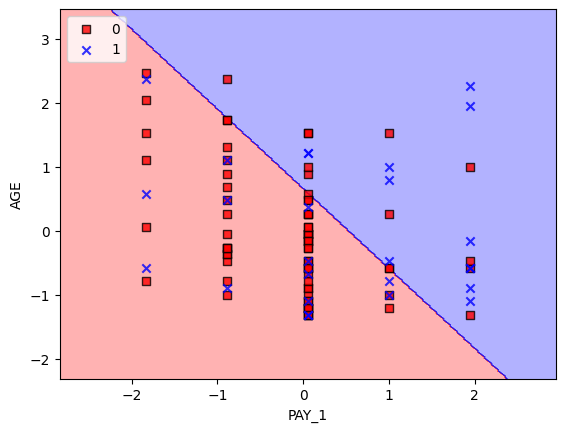

In [16]:
plot_decision_regions(X_stand, y, classifier=ppn)
plt.xlabel('PAY_1')
plt.ylabel('AGE')
plt.legend(loc='upper left')

plt.show()

# Additional Python Tutorial

---

## Lists {-}


List is one of the most frequently data types used in Python. 

- A list is created by placing all the items (elements) inside square brackets `[]`, separated by commas. It can have any number of items and they may be of different types (integer, float, string etc.).

Try the following:
```

my_list = [] # empty list
print(my_list)
print(type(my_list))

my_list = [1, 2, 3] # list of integers
print(my_list)

my_list = [1, "Hello", 3.4] # list with mixed data types
print(my_list)
```


---

**How to access elements from a list**

There are various ways in which we can access the elements of a list.   
- We can use the index operator `[]` to access an item in a list. In Python, indices start at 0. 
    - So, a list having 5 elements will have an index from 0 to 4. Trying to access indexes other than these will raise an IndexError. 
- The index must be an integer. We can't use float or other types, this will result in TypeError. 
- Nested lists are accessed using nested indexing.



```
# List indexing

my_list = ['p', 'r', 'o', 'b', 'e']
print(my_list[0]) # Output: p
print(my_list[2]) # Output: o
print(my_list[4]) # Output: e

n_list = ["Happy", [2, 0, 1, 5]] # Nested List
print(n_list[0][1]) # Nested indexing
print(n_list[1][3])
print(my_list[4.0]) # Error! Only integer can be used for indexing
```

**Negative indexing**

Python allows negative indexing for its sequences. The index of -1 refers to the last item, -2 to the second last item and so on.

```
my_list = ['p','r','o','b','e'] # Negative indexing in lists
print(my_list[-1])
print(my_list[-5])
```

**How to slice lists in Python**

We can access a range of items in a list by using the slicing operator : (colon).

```
# List slicing in Python

my_list = ['p','r','o','g','r','a','m','i','z']
print(my_list[2:5]) # elements 3rd to 5th

print(my_list[:-5])  # elements beginning to 4th
print(my_list[5:])  # elements 6th to end
print(my_list[:]) # elements beginning to end
```

Try this as well

```
my_list = [1, 5, 4]
print(my_list)
print(my_list[::-1])
```

**How to change or add elements to a list**

Lists are **mutable**, meaning their elements can be changed unlike string or tuple. We can use the assignment operator (=) to change an item or a range of items.

```
odd = [2, 4, 6, 8] # Correcting mistake values in a list
odd[0] = 1 # change the 1st item                
print(odd)

odd[1:4] = [3, 5, 7]   # change 2nd to 4th items
print(odd)     
```

We can add one item to a list using the `append()` method or add several items using `extend()` method.

```
# Appending and Extending lists in Python
odd = [1, 3, 5]
odd.append(7)
print(odd)

odd.extend([9, 11, 13])
print(odd)
```

We can also use `+` operator to combine two lists. This is also called concatenation.

The `*` operator repeats a list for the given number of times.

```
# Concatenating and repeating lists
odd = [1, 3, 5]
print(odd + [9, 7, 5])
print(["re"] * 3)
```



**How to delete or remove elements from a list**

We can delete one or more items from a list using the keyword del. It can even delete the list entirely.
```
# Deleting list items
my_list = ['p', 'r', 'o', 'b', 'l', 'e', 'm']
print(my_list)

del my_list[2] # delete one item
print(my_list)

del my_list[1:5] # delete multiple items
print(my_list)

del my_list # delete entire list
# Error: List not defined
print(my_list)
```

---

## The `if` statement {-}


**What is if...else statement in Python**

Decision making is required when we want to execute a code only if a certain condition is satisfied. The `if…elif…else` statement is used in Python for decision making.
```
if test expression:
    statement(s)
```
Here, the program evaluates the `test expression` and will execute statement(s) only if the test expression is `True`. If the test expression is `False`, the statement(s) is not executed. In Python, the body of the `if` statement is indicated by the indentation. The body starts with an indentation and the first unindented line marks the end. Python interprets non-zero values as `True`. `None` and `0` are interpreted as `False`.

Try the following code below:
```
# If the number is positive, we print an appropriate message

num = 3
if num > 0:
    print(num, "is a positive number.")
print("This is always printed.")

num = -1
if num > 0:
    print(num, "is a positive number.")
print("This is also always printed.")
```


- The 'if..else' statement evaluates test expression and will execute the body of 'if' only when the test condition is 'True'. 
- If the condition is 'False', the body of 'else' is executed.
- Indentation is used to separate the blocks.
```
if test expression:
    Body of if
else:
    Body of else
```

Try the following code:
```
# Program checks if the number is positive or negative
# And displays an appropriate message

num = 3

# Try these two variations as well. 
# num = -5
# num = 0

if num >= 0:
    print("Positive or Zero")
else:
    print("Negative number")
```


The `elif` is short for else if. It allows us to check for multiple expressions. If the condition for `if` is `False`, it checks the condition of the next `elif` block and so on. If all the conditions are `False`, the body of else is executed. Only one block among the several `if...elif...else` blocks is executed according to the condition. The if block can have only one `else` block. But it can have multiple `elif` blocks.

```
if test expression:
    Body of if
elif test expression:
    Body of elif
else: 
    Body of else
```

Here's an example:
```
'''In this program, 
we check if the number is positive or
negative or zero and 
display an appropriate message'''

num = 3.4

# Try these two variations as well:
# num = 0
# num = -4.5

if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")
```

---

## `for` loop {-}


The `for` loop in Python is used to iterate over a sequence (e.g. list, tuple, string) or other iterable objects. Iterating over a sequence is called traversal.
```
for val in sequence:
	Body of for
```
Here, `val` is the variable that takes the value of the item inside the sequence on each iteration. Loop continues until we reach the last item in the sequence. The body of for loop is separated from the rest of the code using indentation.

```
# Program to find the sum of all numbers stored in a list


numbers = [6, 5, 3, 8, 4, 2, 5, 4, 11]  # List of numbers
print(numbers)
sum = 0   # variable to store the sum

# iterate over the list
for val in numbers:
	sum = sum+val

print("The sum is", sum)
```

**The `range()` function**

We can generate a sequence of numbers using `range()` function. `range(10)` will generate numbers from 0 to 9 (10 numbers).
We can also define the start, stop and step size as `range(start, stop,step_size)`. step_size defaults to 1 if not provided.

The `range` object is "lazy" in a sense because it doesn't generate every number that it "contains" when we create it. 
- This function does not store all the values in memory; it would be inefficient. 
- So it remembers the start, stop, step size and generates the next number on the go.
- To force this function to output all the items, we can use the function `list()`.

The following example will clarify this.

```
print(range(10))
print(list(range(10)))
print(list(range(2, 8)))
print(list(range(2, 20, 3)))
```



We can use the `range()` function in for loops to iterate through a sequence of numbers. It can be combined with the `len()` function to iterate through a sequence using indexing. Here is an example.
```
# Program to iterate through a list using indexing

genre = ['pop', 'rock', 'jazz']

# iterate over the list using index
for i in range(len(genre)):
	print("I like", genre[i])
```

alternatively, we can achieve the same without indexing

```
genre = ['pop', 'rock', 'jazz']
for item in genre:
    print("I like", item)
```